# Making a Baseline model

For the baseline model we will compare a Logistic Regression and K-Nearest Neighbors algorithms
- We will import the finalized dataset from the EDA notebook
- Next we will partition the target variable 'Exited' from the rest of the dataset
- Next we will split the dataset into training and testing sets as well as perform an over-sampling technique since our target variable is under-represented by a ratio of roughly 4-to-1
- Next will be to fit our models to the training set and look at the metric scores and perform hyper-parameter tuning if necessary

In [1617]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
# from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [1618]:
df = pd.read_csv('../data/finalized_customer_churn_records.csv')
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,...,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,425,0,0,1,1,0,0,1,0,0


In [1619]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Tenure              10000 non-null  int64  
 3   Balance             10000 non-null  float64
 4   NumOfProducts       10000 non-null  int64  
 5   HasCrCard           10000 non-null  int64  
 6   IsActiveMember      10000 non-null  int64  
 7   EstimatedSalary     10000 non-null  float64
 8   Exited              10000 non-null  int64  
 9   Complain            10000 non-null  int64  
 10  Satisfaction Score  10000 non-null  int64  
 11  Point Earned        10000 non-null  int64  
 12  Geography_France    10000 non-null  int64  
 13  Geography_Germany   10000 non-null  int64  
 14  Geography_Spain     10000 non-null  int64  
 15  Gender_Female       10000 non-null  int64  
 16  Gende

In [1620]:
#selecting the target feature
exited = df['Exited'].values

#dropping the target variable from the dataset
df.drop(labels='Exited', axis=1, inplace=True)
df.head()



,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,2,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,1,3,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,3,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,5,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,5,425,0,0,1,1,0,0,1,0,0


## Split dataset into training and testing sets

In [1621]:
#setting randome_state and splitting the dataset into training and test sets

RANDOM_STATE = 3

X_train, X_test, y_train, y_test = train_test_split(df, exited, test_size=.30, stratify=exited, random_state=RANDOM_STATE)

print(
    f'X_train size: {X_train.shape}\ny_train size: {y_train.shape}\nX_test size: {X_test.shape}\ny_test size: {y_test.shape}'
)

X_train size: (7000, 20)
y_train size: (7000,)
X_test size: (3000, 20)
y_test size: (3000,)


# Logistic Regression model implementation

We import the LogisticRegression model, instantiate the model, fit the model to our training set, and then make predictions on the testing set

In [1622]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

logreg = LogisticRegression(random_state=RANDOM_STATE)

%time
logreg.fit(X_train, y_train)



CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 16.9 µs


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=3)

In [1623]:
logreg_pred = logreg.predict(X_test[:20])
true_labels = y_test[:20]

In [1624]:
predictions_df = pd.DataFrame({
    'Actual_label': true_labels,
    'Predictions': logreg_pred
})

predictions_df.head()

,Actual_label,Predictions
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


### Scoring

In [1625]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))
print()
# print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2389
           1       0.71      0.39      0.51       611

    accuracy                           0.84      3000
   macro avg       0.79      0.68      0.71      3000
weighted avg       0.83      0.84      0.83      3000




The classification report shows an accuracy of .84, a precision score of .79, a recall score of .68, and an f-1 score of .71. Since it is drastically more expensive to gain new customers as it is to retain existing customers, the metrics we use in determining the strength of the model will be critical. With this being said the metric(s) to use will be the recall and f-1 score, because of the need to accurately predict the true positive rate or in this case the people who are accurately predicted to exit the bank.

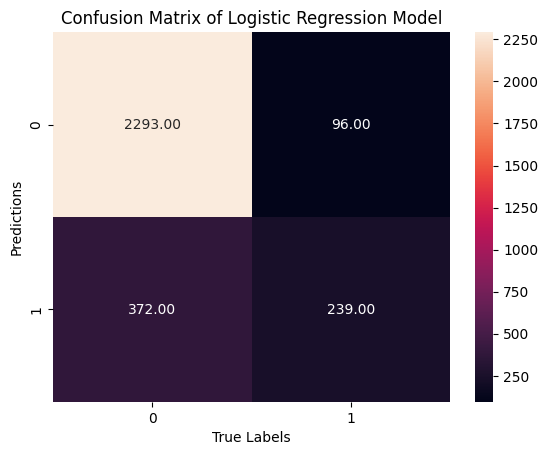

In [1626]:
import seaborn as sns
import matplotlib.pyplot as plt

confusion_matrix_ = confusion_matrix(y_test, y_pred)

sns.heatmap(data=confusion_matrix_, annot=True, fmt='.2f')
plt.xlabel('True Labels')
plt.ylabel('Predictions')
plt.title('Confusion Matrix of Logistic Regression Model')
plt.show()

In [1627]:
print(f'False negative percentage:\n{round(confusion_matrix_[0][1]/len(y_test), 2)*100}')

False negative percentage:
3.0


In [1628]:
from sklearn.metrics import roc_auc_score, roc_curve

# y_prob = logreg.predict_proba(X_test)[:, 1]

# fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# plt.plot(fpr, tpr, label='ROC Curve')
# plt.plot((0, 1), linestyle='--', label='Random Chance')
# plt.legend()
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title(f'ROC score: {round(roc_auc_score(y_test, y_prob),8)}\n\nTrue Positive Rate vs False Positive Rate')
# plt.show()

## K-Nearest Neighbors experamentation

The target variable 'Exited' has been shown in the EDA as well as below that the people who have not exited the bank heavily outnumber the people who have in fact left the bank (~4-to-1 ratio). Since those are the people who we are needing to target so as to retain them as customers we will try an over sampling technique to see if the model's metrics change with the added technique.

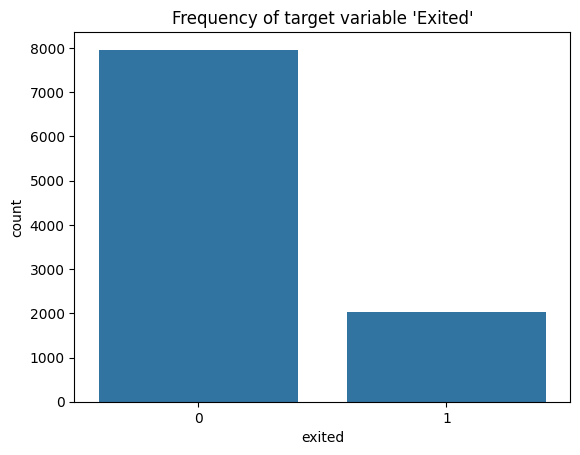

In [1629]:
exited_df = pd.DataFrame({'exited': exited})
# print(exited)

sns.countplot(data=exited_df, x='exited')
plt.title("Frequency of target variable 'Exited'")
plt.show()

In [1630]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

over_sampler = RandomOverSampler(sampling_strategy='minority')
df, exited = over_sampler.fit_resample(df, exited)

X_train, X_test, y_train, y_test = train_test_split(df, exited, test_size=0.30, stratify=exited, random_state=RANDOM_STATE)

print(f'X_train shape: {X_train.shape}\nX_test shape: {X_test.shape}\ny_train shape: {y_train.shape}\ny_test shape: {y_test.shape}')

# print(sum(y_train)/len(y_train))
# print(sum(y_test)/len(y_test))


X_train shape: (11146, 20)
X_test shape: (4778, 20)
y_train shape: (11146,)
y_test shape: (4778,)


Below, we can see the over-sampling technique has matched the frequency of people who have exited the bank with the people who did not exit

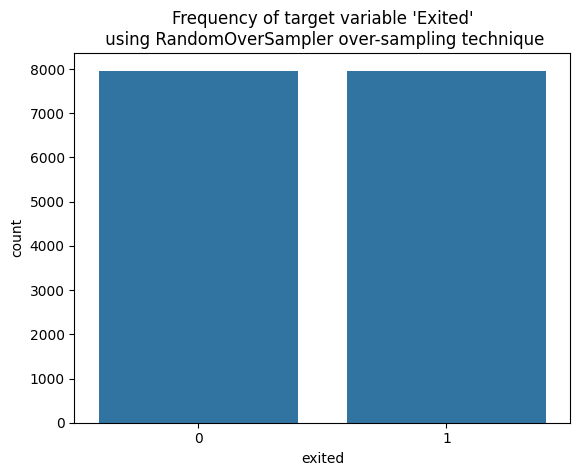

In [1631]:
exited_df = pd.DataFrame({'exited': exited})
# print(exited)

sns.countplot(data=exited_df, x='exited')
plt.title("Frequency of target variable 'Exited'\n using RandomOverSampler over-sampling technique")
plt.show()

## Basic KNN model
* To start off with we will run a standard KNN model to see what kind of scores it gives us
* From there we can hyper-parameter tune later

In [1632]:
knn = KNeighborsClassifier()

%time
knn.fit(X_train, y_train)

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 9.06 µs


KNeighborsClassifier()

In [1633]:
knn_preds = knn.predict(X_test)
print(f'KNN predictions:\n{list(knn_preds[:20])}\n')
print(f'Ground truth labels:\n{list(y_test[:20])}\n\n')

# print(confusion_matrix(y_test, knn_preds))
print(classification_report(y_test, knn_preds))

KNN predictions:
[1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0]

Ground truth labels:
[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0]


              precision    recall  f1-score   support

           0       0.74      0.57      0.64      2389
           1       0.65      0.80      0.72      2389

    accuracy                           0.68      4778
   macro avg       0.69      0.68      0.68      4778
weighted avg       0.69      0.68      0.68      4778



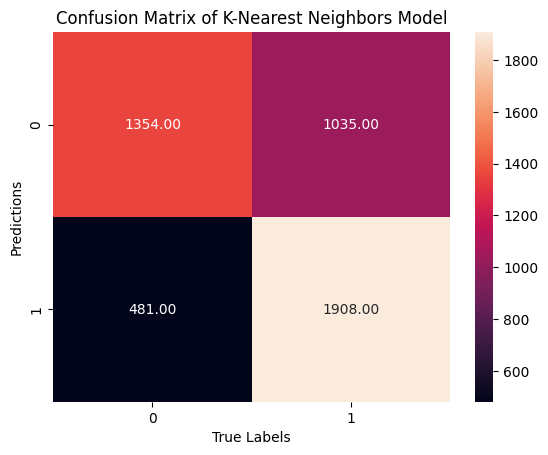

In [1634]:
sns.heatmap(data=confusion_matrix(y_test, knn_preds), fmt='.2f', annot=True)
plt.xlabel('True Labels')
plt.ylabel('Predictions')
plt.title('Confusion Matrix of K-Nearest Neighbors Model')
plt.show()

In [1635]:
print(f'False negative percentage:\n{round(confusion_matrix(y_test, knn_preds)[0][1]/len(y_test), 2)*100}')

False negative percentage:
22.0


In [1636]:
# y_prob = knn.predict_proba(X_test)[:, 1]

# fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# plt.plot(fpr, tpr, label='ROC Curve')
# plt.plot((0, 1), linestyle='--', label='Random Chance')
# plt.legend()
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title(f'ROC score: {round(roc_auc_score(y_test, y_prob),8)}\n\nTrue Positive Rate vs False Positive Rate')
# plt.show()

The basic KNN model shows a recall and f-1 score of .68 which are fairly equal to the scores from the logistic regression model. Since we did not use the over-sampling technique in the logistic regression model it was able to predict false negatives at a rate close to 3%, but with the KNN model, which we performed over-sampling on, the model now has close to a 22% false negative rate.
- Let us tune the model to see if we can get that false negative rate lower!

In [1637]:
print(knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [1638]:
####### initial hyper-parameter fitting

params = {
    'n_neighbors': [3,4,5,6,7],
    'leaf_size': [28,29,30,31,32],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'weights': ['distance', 'uniform'],
    'p': [1,2,3,4]
}

knn_grid = GridSearchCV(estimator=knn, param_grid=params, verbose=2, cv=5, n_jobs=-1, scoring=['f1_weighted', 'recall_macro'], refit='f1_weighted')

knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[CV] END algorithm=auto, leaf_size=28, n_neighbors=3, p=1, weights=distance; total time=   0.8s
[CV] END algorithm=auto, leaf_size=28, n_neighbors=3, p=1, weights=distance; total time=   0.8s
[CV] END algorithm=auto, leaf_size=28, n_neighbors=3, p=1, weights=distance; total time=   0.8s
[CV] END algorithm=auto, leaf_size=28, n_neighbors=3, p=1, weights=distance; total time=   0.8s
[CV] END algorithm=auto, leaf_size=28, n_neighbors=3, p=1, weights=distance; total time=   0.9s
[CV] END algorithm=auto, leaf_size=28, n_neighbors=3, p=2, weights=distance; total time=   0.4s
[CV] END algorithm=auto, leaf_size=28, n_neighbors=3, p=2, weights=distance; total time=   0.4s
[CV] END algorithm=auto, leaf_size=28, n_neighbors=3, p=2, weights=distance; total time=   0.4s
[CV] END algorithm=auto, leaf_size=28, n_neighbors=3, p=1, weights=uniform; total time=   1.5s
[CV] END algorithm=auto, leaf_size=28, n_neighbors=3, p=2, weights=distance; total time=   0.4s
[CV] END algorithm=auto, leaf_size=28, n_

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'leaf_size': [28, 29, 30, 31, 32],
                         'n_neighbors': [3, 4, 5, 6, 7], 'p': [1, 2, 3, 4],
                         'weights': ['distance', 'uniform']},
             refit='f1_weighted', scoring=['f1_weighted', 'recall_macro'],
             verbose=2)

In [1639]:

print(f'KNN best params:\n{knn_grid.best_params_}\n')

KNN best params:
{'algorithm': 'auto', 'leaf_size': 28, 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}



Above, the best parameters of our first run are given and below we will use some of those parameters to fit the model.

In [1640]:
params = {
    'n_neighbors': [3],
    'leaf_size': [28],
    'algorithm': ['auto'],
    'weights': ['distance'],
    'p': [3]
}

knn_grid = GridSearchCV(estimator=knn, param_grid=params, verbose=1, cv=5, n_jobs=-1, scoring=['f1_weighted', 'recall_macro'], refit='f1_weighted')

knn_grid.fit(X_train, y_train)

knn_preds = knn_grid.predict(X_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [1643]:
print(f'KNN best params:\n{knn_grid.best_params_}\n')
print(f'False negative percentage:\n{round(confusion_matrix(y_test, knn_preds)[0][1],2)/len(y_test)*100}')

KNN best params:
{'algorithm': 'auto', 'leaf_size': 28, 'n_neighbors': 3, 'p': 3, 'weights': 'distance'}

False negative percentage:
18.10380912515697


In [1647]:
### final knn model

knn_model = KNeighborsClassifier(n_neighbors=1, leaf_size=26, algorithm='auto', weights='distance', p=2, n_jobs=-1)

%time
knn_model.fit(X_train, y_train)

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 9.06 µs


KNeighborsClassifier(leaf_size=26, n_jobs=-1, n_neighbors=1, weights='distance')

In [1648]:
knn_pred = knn_model.predict(X_test)
print(f'KNN predictions:\n{list(knn_pred[:20])}\n')
print(f'Ground truth labels:\n{list(y_test[:20])}')

KNN predictions:
[1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0]

Ground truth labels:
[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0]


In [1649]:
print(classification_report(y_test, knn_pred))
knn_confusion_matrix = confusion_matrix(y_test, knn_pred)
print(f'False negative percentage:\n{round(knn_confusion_matrix[0][1]/len(y_test), 2)*100}')

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      2389
           1       0.80      0.96      0.87      2389

    accuracy                           0.86      4778
   macro avg       0.87      0.86      0.86      4778
weighted avg       0.87      0.86      0.86      4778

False negative percentage:
12.0


With the hyper-parameter tuning done we can see that the scoring has gotten better; .68 to now .86! The false negative rate that we stated to be very important to this problem has gotten better as well; ~22% to now ~12%!
- With a relatively decent baseline established it will be interesting to see what other models predict

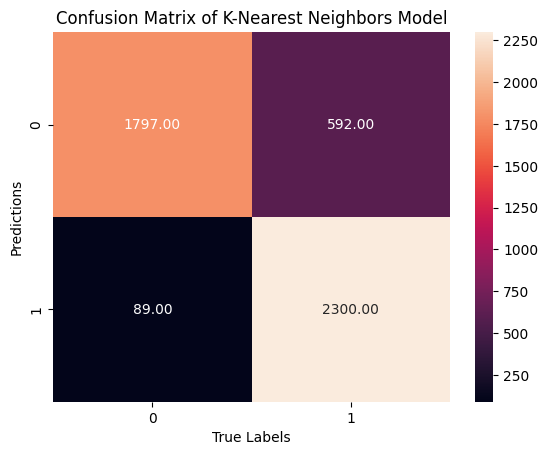

In [1650]:
sns.heatmap(data=knn_confusion_matrix, fmt='.2f', annot=True)
plt.xlabel('True Labels')
plt.ylabel('Predictions')
plt.title('Confusion Matrix of K-Nearest Neighbors Model')
plt.show()

In [1651]:
# y_prob = knn_grid.predict_proba(X_test)[:, 1]

# fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# plt.plot(fpr, tpr, label='ROC Curve')
# plt.plot((0, 1), linestyle='--', label='Random Chance')
# plt.legend()
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title(f'ROC score: {round(roc_auc_score(y_test, y_prob),8)}\n\nTrue Positive Rate vs False Positive Rate')
# plt.show()

# Save model

In [1653]:
import pickle

with open('../final_models/knn_model.pkl', 'wb') as model:
    pickle.dump(knn_model, model)